In [24]:
import pandas as pd
from tqdm import tqdm
import re
%matplotlib inline


In [92]:
df = pd.read_csv('Match Distances.csv')
del df['Unnamed: 0']

In [93]:
def convert_to_event(x):
    if 'MS' in x:
        return ('MS')
    elif 'WS' in x:
        return ('WS')
    elif 'WD' in x:
        return ('WD')
    elif 'MD' in x:
        return ('MD')
    elif 'XD' in x:
        return ('XD')

df['EVENT'] = df['EVENT'].apply(lambda x:convert_to_event(x))

In [94]:
df

,COUNTRIES,EVENT,PLAYERS,SCORES,match_location,match_week,Winning Country,Losing Country,Winning Country Coord_x,Winning Country Coord_y,Losing Country Coord_x,Losing Country Coord_y,match_location Coord_x,match_location Coord_y,Winner Distance,Loser Distance
0,"['[SWE] ', '[GER] ']",MS,"['Jacob Nilsson', 'Kai Schaefer']","['21-14', '22-20']","Huelva, Spain",20180424,SWE,GER,17.260488,64.712586,10.392278,51.110631,-6.94518,37.25455,4044.499342,2464.519258
1,"['[SUI] ', '[RUS] ']",WS,"['Sabrina Jaquet', 'Natalia Perminova']","['21-17', '13-21', '21-17']","Huelva, Spain",20180424,SUI,RUS,8.245024,46.799817,96.805372,61.989526,-6.94518,37.25455,1993.802113,11469.444434
2,"['[RUS] ', '[RUS] ', '[ENG] ', '[ENG] ']",XD,"['Rodion Alimov', 'Alina Davletova', 'Ben Lane...","['21-19', '27-25']","Huelva, Spain",20180424,RUS,ENG,96.805372,61.989526,-1.458628,52.592743,-6.94518,37.25455,11469.444434,1806.962309
3,"['[ENG] ', '[ENG] ', '[NED] ', '[NED] ']",XD,"['Marcus Ellis [3]', 'Lauren Smith', 'Robin Ta...","['17-21', '21-11', '21-15']","Huelva, Spain",20180424,ENG,NED,-1.458628,52.592743,5.616126,52.249375,-6.94518,37.25455,1806.962309,2173.108169
4,"['[FRA] ', '[FRA] ', '[NED] ', '[NED] ']",XD,"['Bastian Kersaudy', 'Lea Palermo', 'Jelle Maa...","['23-21', '21-12']","Huelva, Spain",20180424,FRA,NED,2.550540,46.559417,5.616126,52.249375,-6.94518,37.25455,1477.401661,2173.108169
5,"['[RUS] ', '[CZE] ']",MS,"['Sergey Sirant', 'Milan Ludik']","['21-11', '21-11']","Huelva, Spain",20180424,RUS,CZE,96.805372,61.989526,15.331770,49.738854,-6.94518,37.25455,11469.444434,2834.271380
6,"['[DEN] ', '[DEN] ', '[IRL] ', '[IRL] ']",XD,"['Mathias Christiansen [2]', 'Christinna Peder...","['21-18', '21-16']","Huelva, Spain",20180424,DEN,IRL,10.053934,55.959301,-8.146006,53.175880,-6.94518,37.25455,2805.107980,1760.533879
7,"['[DEN] ', '[DEN] ', '[FRA] ', '[FRA] ']",XD,"['Joachim Fischer Nielsen', 'Alexandra Bøje', ...","['21-16', '23-21']","Huelva, Spain",20180424,DEN,FRA,10.053934,55.959301,2.550540,46.559417,-6.94518,37.25455,2805.107980,1477.401661
8,"['[GER] ', '[BUL] ']",WS,"['Luise Heim', 'Linda Zetchiri']","['21-19', '21-17']","Huelva, Spain",20180424,GER,BUL,10.392278,51.110631,25.236412,42.755008,-6.94518,37.25455,2464.519258,3628.724839
9,"['[ENG] ', '[FRA] ']",MS,"['Toby Penty', 'Lucas Claerbout']","['21-10', '21-7']","Huelva, Spain",20180424,ENG,FRA,-1.458628,52.592743,2.550540,46.559417,-6.94518,37.25455,1806.962309,1477.401661


In [95]:
# Get winner and loser columns

def filter_name(string):
    del_chars = ['[',']','1','2','3','4','5','6','7','8','9','0']
    return_string = string
    for char in string:
        if char in del_chars:
            return_string = return_string.replace(char,'')
    
    return_string = return_string.strip()
    return (return_string)

#Take in line, player team you want to extract and singles or doubles
def split_players(x,player_num,s_or_d):
    #Need to filter out using regex
    return_val = re.findall("'(.*?)'",x)
    
    #Singles
    if s_or_d == 's':
        #only if there are two opponents
        if len(return_val) == 2 and player_num <= 1:
            for i in range(len(return_val)):
                return_val[i] = filter_name(return_val[i])
            return (return_val[player_num])
        else:
            return ('no opponent')
    
    #Doubles
    if s_or_d == 'd':
        #only if position exists
        if len(return_val) == 4 and player_num <= 1:
            for i in range(len(return_val)):
                return_val[i] = filter_name(return_val[i])
            #sort names alphbetically
            ret_list = sorted([return_val[player_num*2],return_val[player_num*2 + 1]])
            ret_str = filter_name(ret_list[0]) + ',' + ret_list[1]
            return (ret_str)
        else:
            return ('no opponent')

In [96]:
#Create the dataframes for each event
df_MS = df[df['EVENT'] == 'MS'].sort_values(by = 'match_week')
df_WS = df[df['EVENT'] == 'WS'].sort_values(by = 'match_week')
df_MD = df[df['EVENT'] == 'MD'].sort_values(by = 'match_week')
df_WD = df[df['EVENT'] == 'WD'].sort_values(by = 'match_week')
df_XD = df[df['EVENT'] == 'XD'].sort_values(by = 'match_week')

#Split players into winners and losers of a match
df_MS['WINNER'] = df_MS['PLAYERS'].apply(lambda x: split_players(x,0,'s'))
df_MS['LOSER'] = df_MS['PLAYERS'].apply(lambda x: split_players(x,1,'s'))
df_WS['WINNER'] = df_WS['PLAYERS'].apply(lambda x: split_players(x,0,'s'))
df_WS['LOSER'] = df_WS['PLAYERS'].apply(lambda x: split_players(x,1,'s'))
df_MD['WINNER'] = df_MD['PLAYERS'].apply(lambda x: split_players(x,0,'d'))
df_MD['LOSER'] = df_MD['PLAYERS'].apply(lambda x: split_players(x,1,'d'))
df_WD['WINNER'] = df_WD['PLAYERS'].apply(lambda x: split_players(x,0,'d'))
df_WD['LOSER'] = df_WD['PLAYERS'].apply(lambda x: split_players(x,1,'d'))
df_XD['WINNER'] = df_XD['PLAYERS'].apply(lambda x: split_players(x,0,'d'))
df_XD['LOSER'] = df_XD['PLAYERS'].apply(lambda x: split_players(x,1,'d'))

In [97]:
df_main = df_MS.copy(deep = True)
df_main = df_main.append(df_WS)
df_main = df_main.append(df_WD)
df_main = df_main.append(df_MD)
df_main = df_main.append(df_XD)

In [98]:
df_main

,COUNTRIES,EVENT,PLAYERS,SCORES,match_location,match_week,Winning Country,Losing Country,Winning Country Coord_x,Winning Country Coord_y,Losing Country Coord_x,Losing Country Coord_y,match_location Coord_x,match_location Coord_y,Winner Distance,Loser Distance,WINNER,LOSER
9058,"['[JPN] ', '[CHN] ']",MS,"['Onodera Yusuke', 'Chen Haoyang']","['11-5', '13-11', '11-6']","Hainan, China",20170110,JPN,CHN,139.271495,36.655227,103.930027,36.567348,109.60000,19.20000,3448.066472,835.149641,Onodera Yusuke,Chen Haoyang
9117,"['[CHN] ', '[CHN] ']",MS,"['Zhao Junpeng [2]', 'Zhu Siyuan']","['11-7', '6-11', '11-7', '6-11', '11-5']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.60000,19.20000,835.149641,835.149641,Zhao Junpeng,Zhu Siyuan
9113,"['[CHN] ', '[CHN] ']",MS,"['Sun Feixiang', 'Wu Xin']","['11-7', '11-6', '11-7']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.60000,19.20000,835.149641,835.149641,Sun Feixiang,Wu Xin
9108,"['[CHN] ', '[JPN] ']",MS,"['Zhao Junpeng [2]', 'Onodera Yusuke']","['11-5', '13-12', '11-3']","Hainan, China",20170110,CHN,JPN,103.930027,36.567348,139.271495,36.655227,109.60000,19.20000,835.149641,3448.066472,Zhao Junpeng,Onodera Yusuke
9104,"['[CHN] ', '[CHN] ']",MS,"['Wu Xin', 'Guo Kai']","['11-1', '11-3', '13-11']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.60000,19.20000,835.149641,835.149641,Wu Xin,Guo Kai
9102,"['[CHN] ', '[CHN] ']",MS,"['Sun Feixiang', 'Gu Junfeng']","['5-11', '11-6', '11-3', '11-7']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.60000,19.20000,835.149641,835.149641,Sun Feixiang,Gu Junfeng
9098,"['[CHN] ', '[THA] ']",MS,"['Zhu Siyuan', 'Wangcharoen Kantaphon']","['11-8', '11-8', '3-11', '13-10']","Hainan, China",20170110,CHN,THA,103.930027,36.567348,101.012239,15.116803,109.60000,19.20000,835.149641,962.131974,Zhu Siyuan,Wangcharoen Kantaphon
9085,"['[CHN] ', '[CHN] ']",MS,"['Zhao Junpeng [2]', 'Haichao Liu']","['11-4', '11-8', '11-8']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.60000,19.20000,835.149641,835.149641,Zhao Junpeng,Haichao Liu
9084,"['[CHN] ', '[INA] ']",MS,"['Sun Feixiang', 'Andre Marteen']","['11-6', '12-13', '11-4', '11-6']","Hainan, China",20170110,CHN,INA,103.930027,36.567348,113.915865,-0.989818,109.60000,19.20000,835.149641,954.360259,Sun Feixiang,Andre Marteen
9074,"['[CHN] ', '[CHN] ']",MS,"['Zhu Siyuan', 'Hongyang Weng']","['11-4', '8-11', '13-11', '11-2']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.60000,19.20000,835.149641,835.149641,Zhu Siyuan,Hongyang Weng


100%|██████████████████████████████████████████████████████████████████████████████| 3815/3815 [01:31<00:00, 41.74it/s]


31.908621638267594

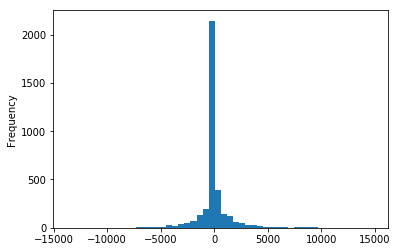

In [102]:
team_list = []
win_distance = []
lose_distance = []
win_pct = []
matches_played = []
for team in tqdm(df_main['WINNER'].unique()):
    team_list.append(team)
    win_distance.append(df_main[df_main['WINNER'] == team]['Winner Distance'].mean())
    lose_distance.append(df_main[df_main['LOSER'] == team]['Loser Distance'].mean())
    matches_played.append(len(df_main[df_main['WINNER'] == team]) + len(df_main[df_main['LOSER'] == team]))
    if len(df_main[df_main['LOSER'] == team]) != 0:
        win_pct.append(len(df_main[df_main['WINNER'] == team])/(len(df_main[df_main['LOSER'] == team]) + len(df_main[df_main['WINNER'] == team])))
    else:
        win_pct.append(1)
        
df_dist = pd.DataFrame()
df_dist['Team'] = team_list
df_dist['Win Dist'] = win_distance
df_dist['Lose Dist'] = lose_distance    
df_dist['Win Pct'] = win_pct
df_dist['Matches Played'] = matches_played
df_dist['Win dist - Lose dist'] = df_dist['Win Dist'] - df_dist['Lose Dist']
df_dist['Win dist - Lose dist'].plot(kind = 'hist', bins = 50)
df_dist['Win dist - Lose dist'].mean()

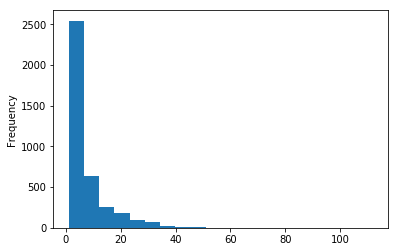

In [108]:
df_dist['Matches Played'].plot(kind = 'hist', bins = 20)

In [111]:
for i in [10,20,30,40,50,60]:
    temp = df_dist[df_dist['Matches Played'] < i]
    temp = df_dist[df_dist['Matches Played'] > i-5]
    print((temp['Win dist - Lose dist'].mean(),temp['Win dist - Lose dist'].std()))

(9.247483971360126, 1940.2445631740063)
(35.68844626012973, 1740.2416462973663)
(-24.670553039261875, 1618.9445768404464)
(21.85118902396081, 1905.7216959007571)
(1294.7174024032197, 1860.3520288760794)
(1280.70008816178, nan)


In [113]:
for i in [.2,.4,.6,.8,1]:
    temp = df_dist[df_dist['Win Pct'] < i]
    temp = df_dist[df_dist['Win Pct'] > i-.2]
    print((temp['Win dist - Lose dist'].mean(),temp['Win dist - Lose dist'].std()))

(31.908621638267594, 1714.7234747369462)
(34.237863608051136, 1670.16196183981)
(15.003814431264031, 1631.4817887137417)
(52.180608702722395, 1627.3741578003842)
(252.8598189486076, 2942.5017643792985)


In [ ]:
df_dist['Win dist - Lose dist'].plot(kind = 'hist', bins = 50)

It appears as it there is no clear trend that distance travelled is affecting the performance of players. There could be several reasons: Balance of pressure, people travel far for easier tournaments...

# Home court advantage

It may be the case that distance doesn't matter - it's an unfamiliar resting spot plus home crowd that makes a difference

In [114]:
df_dist.head()

,Team,Win Dist,Lose Dist,Win Pct,Win dist - Lose dist,Matches Played
0,Onodera Yusuke,3448.066472,3448.066472,0.666667,0.000000e+00,3
1,Zhao Junpeng,4386.773114,4841.593515,0.656250,-4.548204e+02,32
2,Sun Feixiang,3031.946732,3746.196034,0.761905,-7.142493e+02,21
3,Wu Xin,835.149641,835.149641,0.750000,1.136868e-13,4
4,Zhu Siyuan,1074.015469,835.149641,0.800000,2.388658e+02,5


In [117]:
team_list = list(df_dist[df_dist['Matches Played'] > 20]['Team'].unique())

In [115]:
df_main.head()

,COUNTRIES,EVENT,PLAYERS,SCORES,match_location,match_week,Winning Country,Losing Country,Winning Country Coord_x,Winning Country Coord_y,Losing Country Coord_x,Losing Country Coord_y,match_location Coord_x,match_location Coord_y,Winner Distance,Loser Distance,WINNER,LOSER
9058,"['[JPN] ', '[CHN] ']",MS,"['Onodera Yusuke', 'Chen Haoyang']","['11-5', '13-11', '11-6']","Hainan, China",20170110,JPN,CHN,139.271495,36.655227,103.930027,36.567348,109.6,19.2,3448.066472,835.149641,Onodera Yusuke,Chen Haoyang
9117,"['[CHN] ', '[CHN] ']",MS,"['Zhao Junpeng [2]', 'Zhu Siyuan']","['11-7', '6-11', '11-7', '6-11', '11-5']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.6,19.2,835.149641,835.149641,Zhao Junpeng,Zhu Siyuan
9113,"['[CHN] ', '[CHN] ']",MS,"['Sun Feixiang', 'Wu Xin']","['11-7', '11-6', '11-7']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.6,19.2,835.149641,835.149641,Sun Feixiang,Wu Xin
9108,"['[CHN] ', '[JPN] ']",MS,"['Zhao Junpeng [2]', 'Onodera Yusuke']","['11-5', '13-12', '11-3']","Hainan, China",20170110,CHN,JPN,103.930027,36.567348,139.271495,36.655227,109.6,19.2,835.149641,3448.066472,Zhao Junpeng,Onodera Yusuke
9104,"['[CHN] ', '[CHN] ']",MS,"['Wu Xin', 'Guo Kai']","['11-1', '11-3', '13-11']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.6,19.2,835.149641,835.149641,Wu Xin,Guo Kai


In [121]:
def home_court(x):
    if x < 200:
        return (1)
    else:
        return (0)

df_main['Winner Home'] = df_main['Winner Distance'].apply(lambda x: home_court(x))
df_main['Loser Home'] = df_main['Loser Distance'].apply(lambda x: home_court(x))

In [122]:
home_winners = df_main[df_main['Winner Home'] == 1]

,COUNTRIES,EVENT,PLAYERS,SCORES,match_location,match_week,Winning Country,Losing Country,Winning Country Coord_x,Winning Country Coord_y,Losing Country Coord_x,Losing Country Coord_y,match_location Coord_x,match_location Coord_y,Winner Distance,Loser Distance,WINNER,LOSER,Winner Home,Loser Home
14542,"['[EST] ', '[INA] ']",MS,"['Raul Must [1]', 'Wibowo Setyaldi Putra']","['21-14', '21-19']","Tallinn, Estonia",20170112,EST,INA,25.477224,58.672041,113.915865,-0.989818,24.75258,59.43642,111.458637,8720.573122,Raul Must,Wibowo Setyaldi Putra,1,0
14616,"['[EST] ', '[NED] ']",MS,"['Raul Must [1]', 'Erik Meijs']","['21-11', '22-20']","Tallinn, Estonia",20170112,EST,NED,25.477224,58.672041,5.616126,52.249375,24.75258,59.43642,111.458637,2262.540132,Raul Must,Erik Meijs,1,0
14589,"['[EST] ', '[GER] ']",MS,"['Raul Must [1]', 'Alexander Roovers']","['21-13', '21-18']","Tallinn, Estonia",20170112,EST,GER,25.477224,58.672041,10.392278,51.110631,24.75258,59.43642,111.458637,1823.553321,Raul Must,Alexander Roovers,1,0
14626,"['[EST] ', '[ENG] ']",MS,"['Raul Must [1]', 'Toby Penty [6]']","['16-21', '24-22', '21-13']","Tallinn, Estonia",20170112,EST,ENG,25.477224,58.672041,-1.458628,52.592743,24.75258,59.43642,111.458637,3007.454220,Raul Must,Toby Penty,1,0
13213,"['[MAS] ', '[IND] ']",MS,"['Zulfadli Zulkiffli [13]', 'Abhishek Yelegar']","['21-13', '21-14']","Sibu, Malaysia",20170117,MAS,IND,112.500000,2.500000,79.443327,23.379380,111.82941,2.30569,75.033880,3547.717450,Zulfadli Zulkiffli,Abhishek Yelegar,1,0
13209,"['[MAS] ', '[INA] ']",MS,"['Wei Feng Chong', 'Sony Dwi Kuncoro [11]']","['12-21', '21-6', '21-9']","Sibu, Malaysia",20170117,MAS,INA,112.500000,2.500000,113.915865,-0.989818,111.82941,2.30569,75.033880,272.238432,Wei Feng Chong,Sony Dwi Kuncoro,1,0
13207,"['[MAS] ', '[INA] ']",MS,"['Satheishtharan R.', 'Alamsyah Yunus']","['21-12', '21-17']","Sibu, Malaysia",20170117,MAS,INA,112.500000,2.500000,113.915865,-0.989818,111.82941,2.30569,75.033880,272.238432,Satheishtharan R.,Alamsyah Yunus,1,0
13196,"['[MAS] ', '[MAS] ']",MS,"['Vincent Cheng Wei Phuah', 'Lishwan Mudukasan']","['21-15', '16-21', '21-14']","Sibu, Malaysia",20170117,MAS,MAS,112.500000,2.500000,112.500000,2.500000,111.82941,2.30569,75.033880,75.033880,Vincent Cheng Wei Phuah,Lishwan Mudukasan,1,1
13222,"['[MAS] ', '[INA] ']",MS,"['Joo Ven Soong', 'Panji Akbar Sudrajat']","['21-14', '21-15']","Sibu, Malaysia",20170117,MAS,INA,112.500000,2.500000,113.915865,-0.989818,111.82941,2.30569,75.033880,272.238432,Joo Ven Soong,Panji Akbar Sudrajat,1,0
13223,"['[MAS] ', '[USA] ']",MS,"['June Wei Cheam', 'Yan Tuck Chan']","['21-7', '21-6']","Sibu, Malaysia",20170117,MAS,USA,112.500000,2.500000,-99.414619,39.398703,111.82941,2.30569,75.033880,16700.417785,June Wei Cheam,Yan Tuck Chan,1,0


In [126]:
df_hc = df_main[['PLAYERS','match_location','WINNER','LOSER','Winner Home','Loser Home']]

In [128]:
temp = df_hc[df_hc['PLAYERS'].str.contains('Lee Chong Wei')]
temp['rounds'] = [1]*len(temp)
temp

c:\users\andrew.zhuang\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PLAYERS,match_location,WINNER,LOSER,Winner Home,Loser Home,rounds
14352,"['Lee Chong Wei [1]', 'Brice Leverdez']","Birmingham, England",Lee Chong Wei,Brice Leverdez,0,0,1
14392,"['Lee Chong Wei [1]', 'Chou Tien Chen']","Birmingham, England",Lee Chong Wei,Chou Tien Chen,0,0,1
14402,"['Lee Chong Wei [1]', 'Shi Yuqi']","Birmingham, England",Lee Chong Wei,Shi Yuqi,0,0,1
14380,"['Lee Chong Wei [1]', 'Tzu Wei Wang']","Birmingham, England",Lee Chong Wei,Tzu Wei Wang,0,0,1
14389,"['Lee Chong Wei [1]', 'Tian Houwei [7]']","Birmingham, England",Lee Chong Wei,Tian Houwei,0,0,1
8917,"['Lee Chong Wei [1]', 'Rajiv Ouseph']","Kuching, Malaysia",Lee Chong Wei,Rajiv Ouseph,0,0,1
8980,"['Lee Chong Wei [1]', 'Jeon Hyeok Jin']","Kuching, Malaysia",Lee Chong Wei,Jeon Hyeok Jin,0,0,1
9000,"['Lin Dan [7]', 'Lee Chong Wei [1]']","Kuching, Malaysia",Lin Dan,Lee Chong Wei,0,0,1
8936,"['Lee Chong Wei [1]', 'Hu Yun']","Kuching, Malaysia",Lee Chong Wei,Hu Yun,0,0,1
8995,"['Lee Chong Wei [1]', 'Wong Wing Ki Vincent']","Kuching, Malaysia",Lee Chong Wei,Wong Wing Ki Vincent,0,0,1


In [ ]:
### EXTRACT COUNTRY IN match location and match it with it's code, and then identify home.

## Groupby Match locations to see rounds (not code)

# See how many rounds the home loctaion has compared to others
